## Import Dataset
* Read all the data files from previous seasons
* Keep only required columns
* Concatenate the data from the files together
* Import the concatenated data into a data frame

In [17]:
import pandas as pd
from glob import glob

req_cols = ['Date', 'HomeTeam', 'AwayTeam', 
            'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR',
            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 
            'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
all_df = []
for file in glob('../data/*.csv'):
    print('reading', file)
    df = pd.read_csv(file, usecols=req_cols)
    df = df[req_cols]
    all_df.append(df)

concat_df = pd.concat(all_df, axis=0, sort=False)
concat_df.to_csv('../data/combined/combined_data.csv', index=None)
print('All data read and saved.')
    
data = pd.read_csv('../data/combined/combined_data.csv')
print(data.shape[0], 'matches')
data.head(5)

reading ../data/season-2010-2011.csv
reading ../data/season-2020-2021.csv
reading ../data/season-2019-2020.csv
reading ../data/season-2023-2024.csv
reading ../data/season-2011-2012.csv
reading ../data/season-2024-2025.csv
reading ../data/season-2021-2022.csv
reading ../data/season-2022-2023.csv
reading ../data/season-2018-2019.csv
reading ../data/season-2016-2017.csv
reading ../data/season-2015-2016.csv
reading ../data/season-2014-2015.csv
reading ../data/season-2013-2014.csv
reading ../data/season-2012-2013.csv
reading ../data/season-2017-2018.csv
All data read and saved.
5681 matches


,Date,HomeTeam,AwayTeam,HTHG,HTAG,HTR,FTHG,FTAG,FTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,14/08/10,Aston Villa,West Ham,2.0,0.0,H,3.0,0.0,H,23.0,...,11.0,2.0,16.0,7.0,15.0,15.0,1.0,2.0,0.0,0.0
1,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,7.0,...,2.0,12.0,1.0,3.0,19.0,14.0,2.0,1.0,0.0,0.0
2,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,13.0,...,9.0,7.0,4.0,8.0,12.0,13.0,1.0,3.0,0.0,0.0
3,14/08/10,Chelsea,West Brom,2.0,0.0,H,6.0,0.0,H,18.0,...,13.0,4.0,3.0,1.0,10.0,10.0,1.0,0.0,0.0,0.0
4,14/08/10,Sunderland,Birmingham,1.0,0.0,H,2.0,2.0,D,6.0,...,2.0,7.0,3.0,6.0,13.0,10.0,3.0,3.0,1.0,0.0


### Obtain team names
* Read the current season's data file
* Obtain the list of home teams from the records
* Find the unique teams from the home teams list

In [18]:
curr_df = pd.read_csv('../data/season-2024-2025.csv')

home_teams = curr_df['HomeTeam']

teams = []
for t in home_teams:
    if t not in teams:
        teams.append(t)
        
teams_df = pd.DataFrame(teams, columns=["Teams"])
display(teams_df)

,Teams
0,Man United
1,Ipswich
2,Arsenal
3,Everton
4,Newcastle
5,Nott'm Forest
6,West Ham
7,Brentford
8,Chelsea
9,Leicester


## Data Analysis

### Inspect the columns

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5680 non-null   object 
 1   HomeTeam  5680 non-null   object 
 2   AwayTeam  5680 non-null   object 
 3   HTHG      5680 non-null   float64
 4   HTAG      5680 non-null   float64
 5   HTR       5680 non-null   object 
 6   FTHG      5680 non-null   float64
 7   FTAG      5680 non-null   float64
 8   FTR       5680 non-null   object 
 9   HS        5680 non-null   float64
 10  AS        5680 non-null   float64
 11  HST       5680 non-null   float64
 12  AST       5680 non-null   float64
 13  HC        5680 non-null   float64
 14  AC        5680 non-null   float64
 15  HF        5680 non-null   float64
 16  AF        5680 non-null   float64
 17  HY        5680 non-null   float64
 18  AY        5680 non-null   float64
 19  HR        5680 non-null   float64
 20  AR        5680 non-null   floa

### Home Team win rate

In [20]:
total_matches = data.shape[0]
print('Total matches:', total_matches)

total_home_wins = len(data[data['FTR'] == 'H'])
print('Total Home team wins:', total_home_wins)

home_wins_rate = (total_home_wins/total_matches)*100
print('Home wins rate: %.2f' % home_wins_rate,'%')

Total matches: 5681
Total Home team wins: 2548
Home wins rate: 44.85 %


### Team Statistics

In [21]:
import pandas as pd

def getData(team):
    print('\n______________', team, '______________\n')
    
    home_games = data[data['HomeTeam'] == team]
    away_games = data[data['AwayTeam'] == team]
    total_games = pd.concat([home_games, away_games])  # Fixed here
    num_games = len(total_games.index)
    print('Total games played:', num_games)
    
    # Games result calculations
    games_won = total_games[((total_games['HomeTeam'] == team) & (total_games['FTR'] == 'H')) |
                            ((total_games['AwayTeam'] == team) & (total_games['FTR'] == 'A'))]
    num_games_won = len(games_won.index)
    print('Total games won:', num_games_won)

    games_lost = total_games[((total_games['HomeTeam'] == team) & (total_games['FTR'] == 'A')) |
                             ((total_games['AwayTeam'] == team) & (total_games['FTR'] == 'H'))]
    num_games_lost = len(games_lost.index)
    print('Total games lost:', num_games_lost)

    games_drawn = total_games[total_games['FTR'] == 'D']
    num_games_drawn = len(games_drawn.index)
    print('Total games drawn:', num_games_drawn)
    
    # Percentages
    games_won_rate = num_games_won / num_games if num_games != 0 else 0
    games_lost_rate = num_games_lost / num_games if num_games != 0 else 0
    games_drawn_rate = num_games_drawn / num_games if num_games != 0 else 0
    
    print('Win percentage: %.2f' % (games_won_rate * 100), '%')
    print('Lose percentage: %.2f' % (games_lost_rate * 100), '%')
    print('Draw percentage: %.2f' % (games_drawn_rate * 100), '%')

    # Goals scored
    home_goals = home_games['FTHG'].sum()
    away_goals = away_games['FTAG'].sum()
    total_goals = int(home_goals + away_goals)
    print('Total goals scored:', total_goals)

    # Goals conceded
    home_goals_conc = home_games['FTAG'].sum()
    away_goals_conc = away_games['FTHG'].sum()
    total_goals_conc = int(home_goals_conc + away_goals_conc)
    print('Total goals conceded:', total_goals_conc)

    GPG = total_goals / num_games if num_games != 0 else 0
    GCPG = total_goals_conc / num_games if num_games != 0 else 0
    print('Goals scored per game: %.2f' % GPG)
    print('Goals conceded per game: %.2f' % GCPG)

    # Shots
    home_shots = home_games['HS'].sum()
    away_shots = away_games['AS'].sum()
    total_shots = int(home_shots + away_shots)
    print('Total shots hit:', total_shots)

    home_shots_ontarget = home_games['HST'].sum()
    away_shots_ontarget = away_games['AST'].sum()
    total_shots_ontarget = int(home_shots_ontarget + away_shots_ontarget)
    print('Total shots on target:', total_shots_ontarget)

    home_shots_against = home_games['AS'].sum()
    away_shots_against = away_games['HS'].sum()
    total_shots_against = int(home_shots_against + away_shots_against)
    print('Total shots allowed:', total_shots_against)

    HSPG = total_shots / num_games if num_games != 0 else 0
    ASPG = total_shots_against / num_games if num_games != 0 else 0
    print('Shots taken per game: %.2f' % HSPG)
    print('Shots allowed per game: %.2f' % ASPG)

    scoring_rate = (total_goals / total_shots) if total_shots != 0 else 0
    print('Goal Scoring percentage: %.2f' % (scoring_rate * 100), '%')

    # Cards and fouls
    home_yellow_cards = home_games['HY'].sum()
    away_yellow_cards = away_games['AY'].sum()
    total_yellow_cards = int(home_yellow_cards + away_yellow_cards)
    print('Total yellow cards received:', total_yellow_cards)

    home_red_cards = home_games['HR'].sum()
    away_red_cards = away_games['AR'].sum()
    total_red_cards = int(home_red_cards + away_red_cards)
    print('Total red cards received:', total_red_cards)

    home_fouls = home_games['HF'].sum()
    away_fouls = away_games['AF'].sum()
    total_fouls = int(home_fouls + away_fouls)
    print('Total fouls committed:', total_fouls)

    return [
        team, num_games, num_games_won, games_won_rate, num_games_lost,
        num_games_drawn, total_goals, scoring_rate, total_goals_conc,
        total_shots, total_shots_ontarget, total_shots_against,
        total_fouls, total_yellow_cards, total_red_cards
    ]


In [22]:
stat_list = []
for team in teams:
    stat = getData(team)
    stat_list.append(stat)
    
team_stats = pd.DataFrame(
    stat_list, 
    columns=['Team', 'Games', 'Wins', 'Win Rate', 'Losses', 'Draws', 
            'Goals scored', 'Scoring Rate', 'Goals Conceded', 
            'Shots', 'Shots on Target', 'Shots Against', 'Fouls', 
            'Yellow Cards', 'Red Cards'])


______________ Man United ______________

Total games played: 568
Total games won: 305
Total games lost: 132
Total games drawn: 131
Win percentage: 53.70 %
Lose percentage: 23.24 %
Draw percentage: 23.06 %
Total goals scored: 968
Total goals conceded: 630
Goals scored per game: 1.70
Goals conceded per game: 1.11
Total shots hit: 7951
Total shots on target: 3282
Total shots allowed: 6698
Shots taken per game: 14.00
Shots allowed per game: 11.79
Goal Scoring percentage: 12.17 %
Total yellow cards received: 1018
Total red cards received: 29
Total fouls committed: 6272

______________ Ipswich ______________

Total games played: 36
Total games won: 4
Total games lost: 22
Total games drawn: 10
Win percentage: 11.11 %
Lose percentage: 61.11 %
Draw percentage: 27.78 %
Total goals scored: 35
Total goals conceded: 77
Goals scored per game: 0.97
Goals conceded per game: 2.14
Total shots hit: 342
Total shots on target: 121
Total shots allowed: 588
Shots taken per game: 9.50
Shots allowed per game

In [23]:
display(team_stats)
team_stats.to_csv('../data/statistics/team_stats.csv')

,Team,Games,Wins,Win Rate,Losses,Draws,Goals scored,Scoring Rate,Goals Conceded,Shots,Shots on Target,Shots Against,Fouls,Yellow Cards,Red Cards
0,Man United,568,305,0.536972,132,131,968,0.121746,630,7951,3282,6698,6272,1018,29
1,Ipswich,36,4,0.111111,22,10,35,0.102339,77,342,121,588,408,83,5
2,Arsenal,568,316,0.556338,129,123,1063,0.128428,628,8277,3379,6110,5709,902,54
3,Everton,568,204,0.359155,200,164,731,0.103614,739,7055,2774,7228,6233,957,42
4,Newcastle,530,192,0.362264,213,125,714,0.109041,780,6548,2524,6844,5667,901,40
5,Nott'm Forest,112,36,0.321429,48,28,143,0.113312,179,1262,425,1580,1247,239,5
6,West Ham,530,175,0.330189,221,134,699,0.109750,807,6369,2295,7742,5428,869,35
7,Brentford,150,54,0.360000,59,37,225,0.130133,220,1729,659,2224,1407,261,7
8,Chelsea,568,303,0.533451,133,132,1002,0.114136,616,8779,3476,5975,5970,986,37
9,Leicester,378,139,0.367725,155,84,548,0.120572,558,4545,1599,5018,4019,574,24


### Goal Scoring analysis

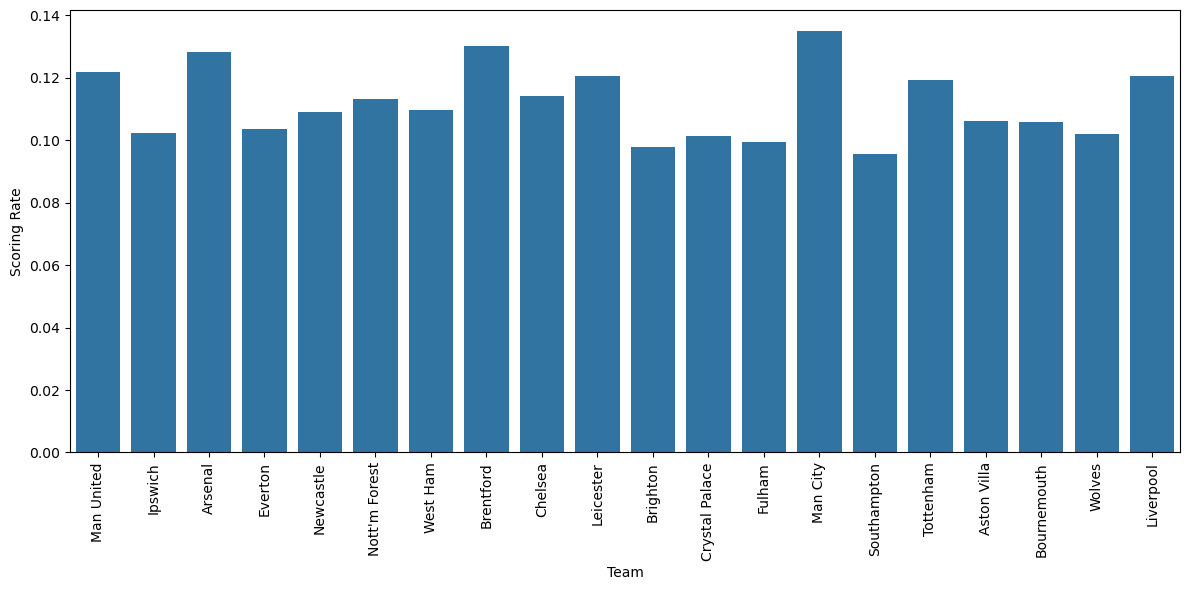

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # Optional: makes the plot wider
GS = sns.barplot(x='Team', y='Scoring Rate', data=team_stats)
GS.tick_params(axis='x', rotation=90)  # ✅ This avoids the warning

plt.tight_layout()
plt.show()


### Win Analysis

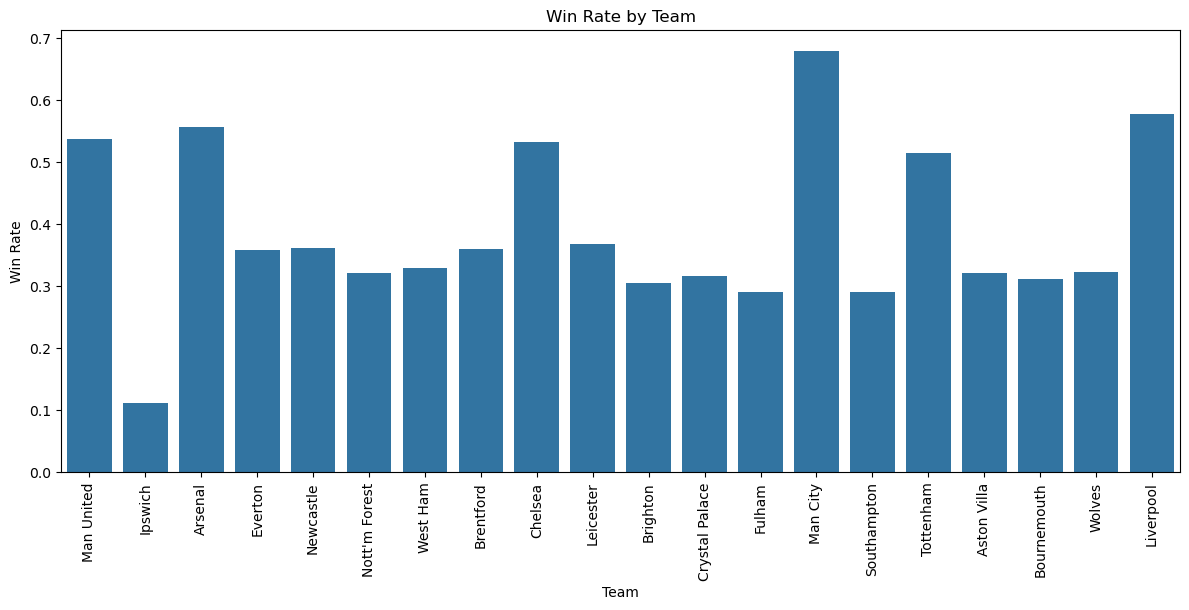

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Win Rate per team
plt.figure(figsize=(12, 6))  # Optional: makes the plot wider
WR = sns.barplot(x='Team', y='Win Rate', data=team_stats)

# Rotate x-axis labels cleanly (without warnings)
WR.tick_params(axis='x', rotation=90)

# Improve layout
plt.tight_layout()
plt.title('Win Rate by Team')  # Optional: title
plt.xlabel('Team')
plt.ylabel('Win Rate')

plt.show()

### Goals and Shots analysis

<Figure size 640x480 with 0 Axes>

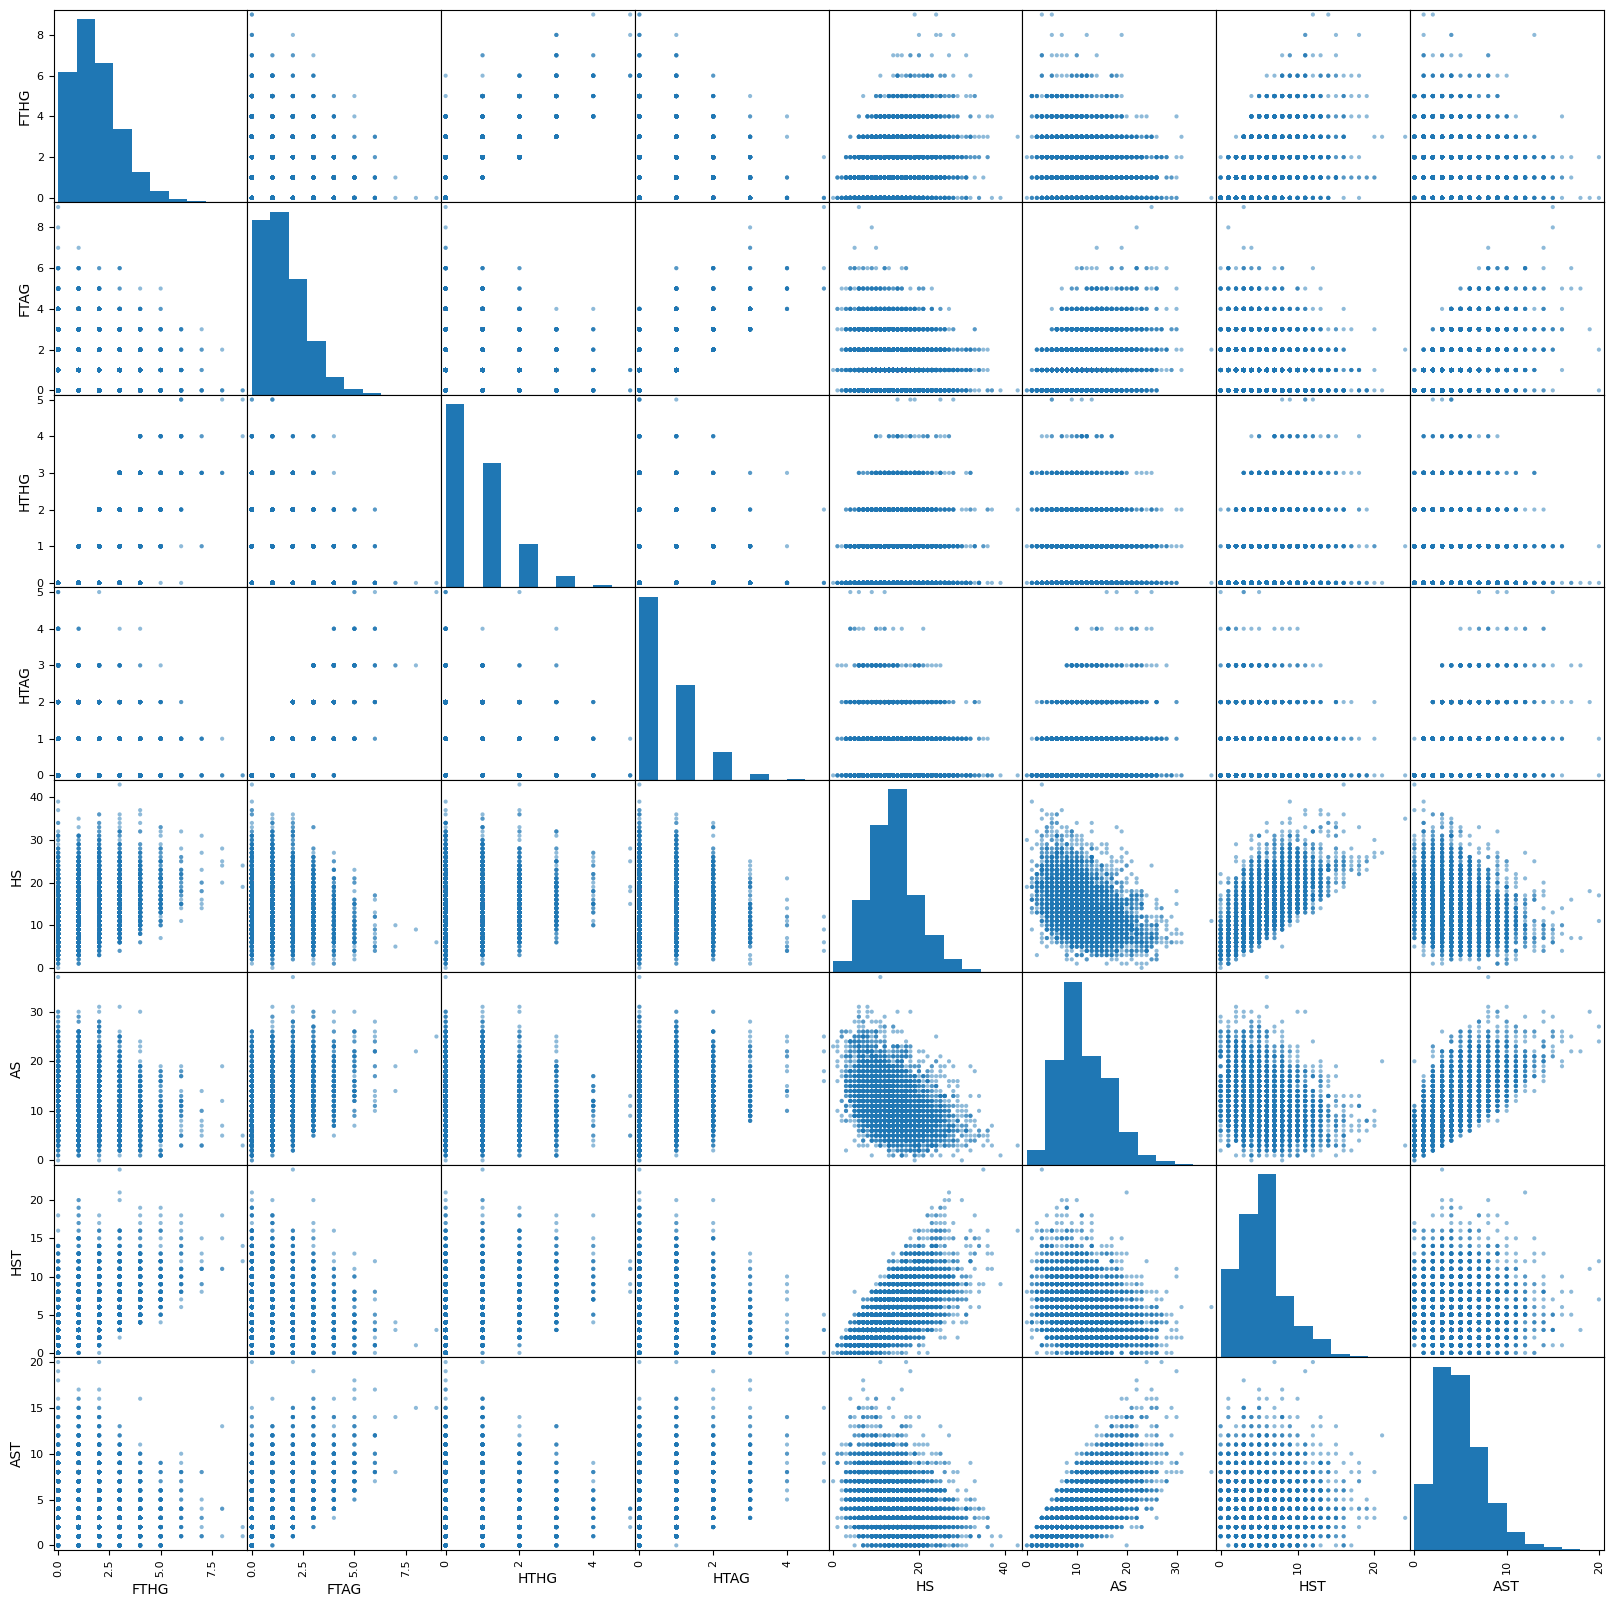

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']], 
               figsize=(20,20))
plt.show()